In [2]:
pip install kagglehub


  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/3c/74/10ea2151b11f8591f82d39c70c1dcc43d0160ba41f8ddb644eb1f5eac348/kagglehub-0.3.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
   -------------------------------------- - 41.0/43.0 kB ? eta -:--:--
   ---------------------------------------- 43.0/43.0 kB 348.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 1.99M/1.99M [00:04<00:00, 431kB/s]

Extracting files...


Path to dataset files: C:\Users\This pc\.cache\kagglehub\datasets\jp797498e\twitter-entity-sentiment-analysis\versions\2


In [5]:
df = r"C:\Users\This pc\.cache\kagglehub\datasets\jp797498e\twitter-entity-sentiment-analysis\versions\2"


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv ("C:/Users/This pc/Desktop/twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.shape

(74681, 4)

In [5]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df["Positive"].value_counts()

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [8]:
df["Borderlands"].value_counts()

Borderlands
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [9]:
cross_tab = pd.crosstab(df['Borderlands'], df['Positive'])
print(cross_tab)

Positive                           Irrelevant  Negative  Neutral  Positive
Borderlands                                                               
Amazon                                    192       576     1236       312
ApexLegends                               192       600      942       642
AssassinsCreed                            264       378      156      1446
Battlefield                               918       474      360       594
Borderlands                               240       426      600      1019
CS-GO                                     636       348      552       768
CallOfDuty                                672       894      378       450
CallOfDutyBlackopsColdWar                 576       576      360       864
Cyberpunk2077                             480       390      468       966
Dota2                                     426       768      588       582
FIFA                                      558      1176      102       504
Facebook                 

Positive                           Irrelevant   Negative    Neutral   Positive
Borderlands                                                                   
Amazon                               8.290155  24.870466  53.367876  13.471503
ApexLegends                          8.080808  25.252525  39.646465  27.020202
AssassinsCreed                      11.764706  16.844920   6.951872  64.438503
Battlefield                         39.130435  20.204604  15.345269  25.319693
Borderlands                         10.503282  18.643326  26.258206  44.595186
CS-GO                               27.604167  15.104167  23.958333  33.333333
CallOfDuty                          28.070175  37.343358  15.789474  18.796992
CallOfDutyBlackopsColdWar           24.242424  24.242424  15.151515  36.363636
Cyberpunk2077                       20.833333  16.927083  20.312500  41.927083
Dota2                               18.020305  32.487310  24.873096  24.619289
FIFA                                23.846154  50.25

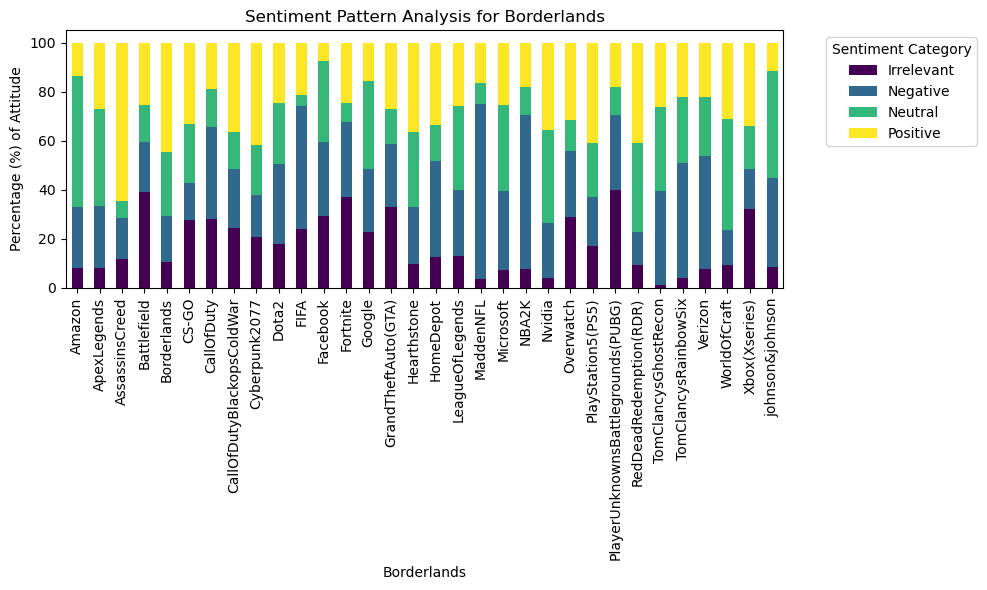

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(df['Borderlands'], df['Positive'])

cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print(cross_tab_normalized)
cross_tab_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Sentiment Pattern Analysis for Borderlands')
plt.xlabel('Borderlands')
plt.ylabel('Percentage (%) of Attitude')
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


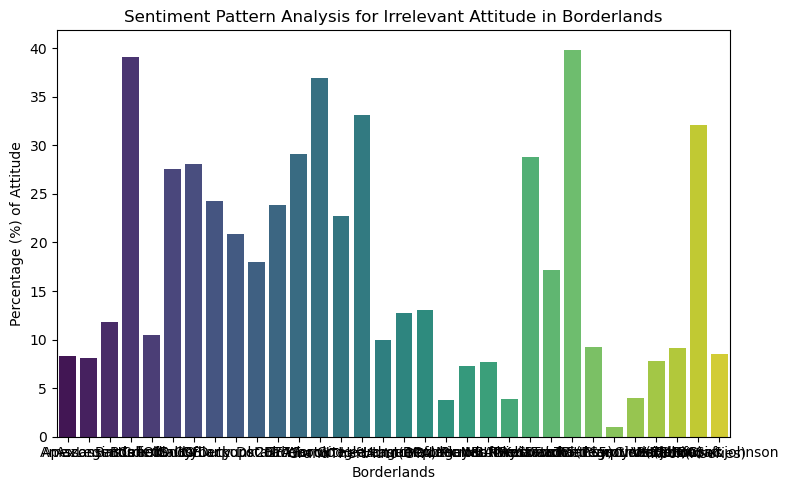

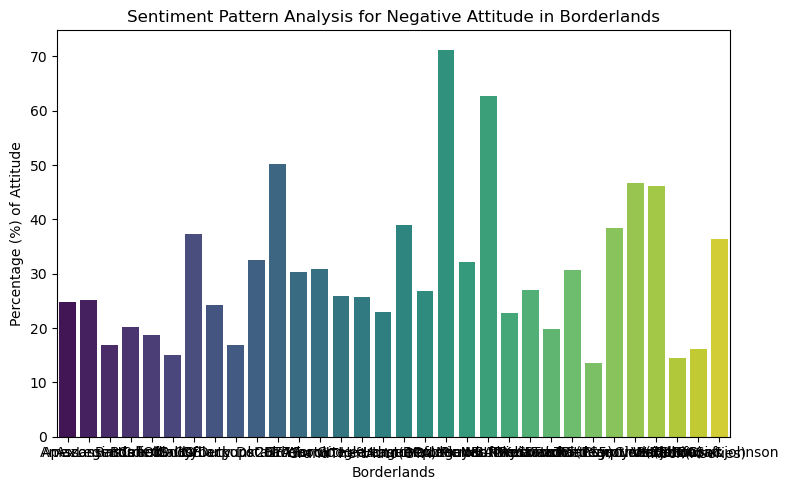

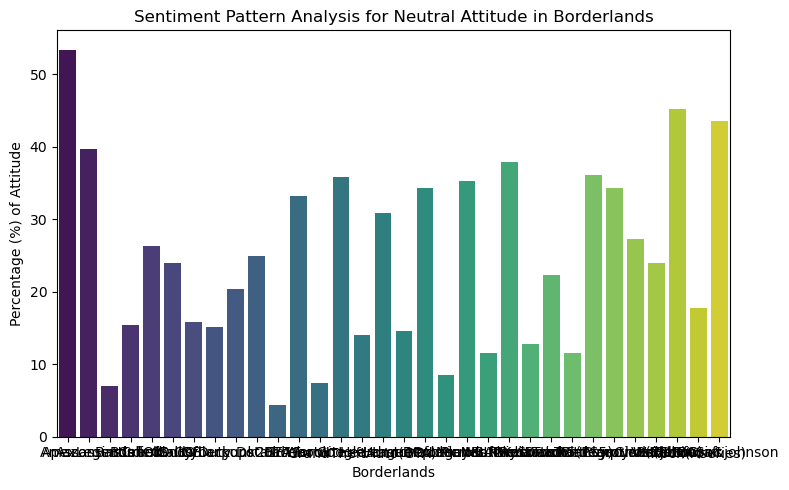

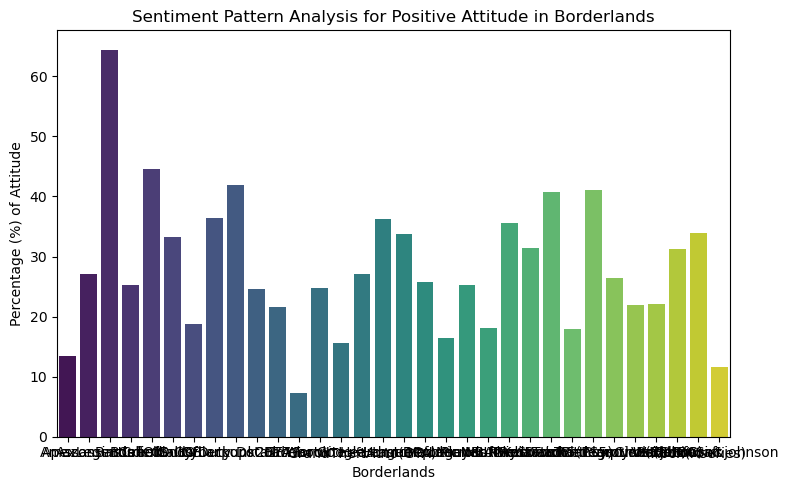

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cross_tab_normalized is already defined
# Iterate over each column (sentiment category) in the normalized DataFrame
for sentiment in cross_tab_normalized.columns:
    plt.figure(figsize=(8, 5))
    
    # Plot the current sentiment category
    sns.barplot(x=cross_tab_normalized.index, y=cross_tab_normalized[sentiment], palette='viridis')
    
    # Add titles and labels
    plt.title(f'Sentiment Pattern Analysis for {sentiment} Attitude in Borderlands')
    plt.xlabel('Borderlands')
    plt.ylabel('Percentage (%) of Attitude')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


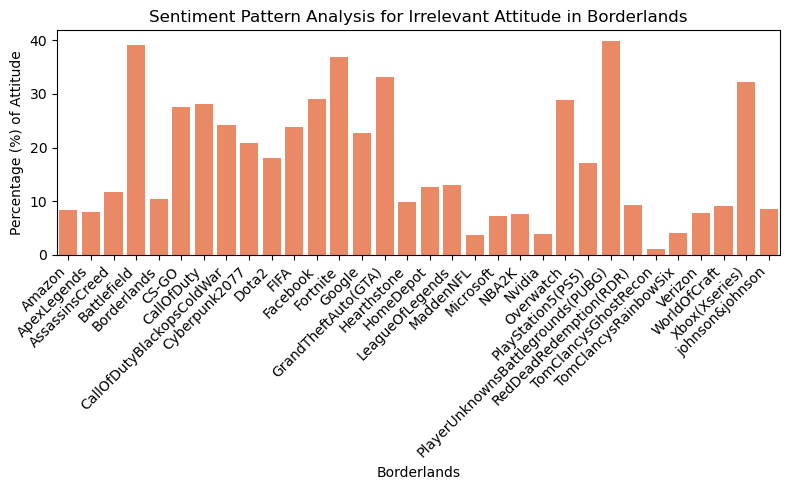

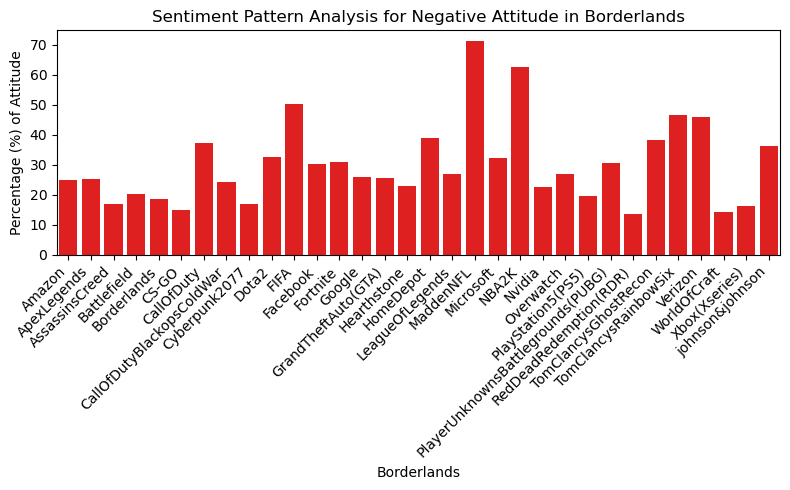

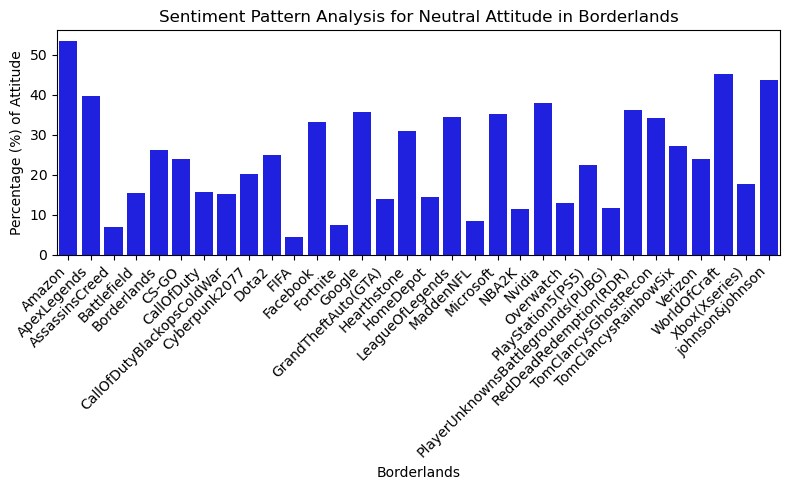

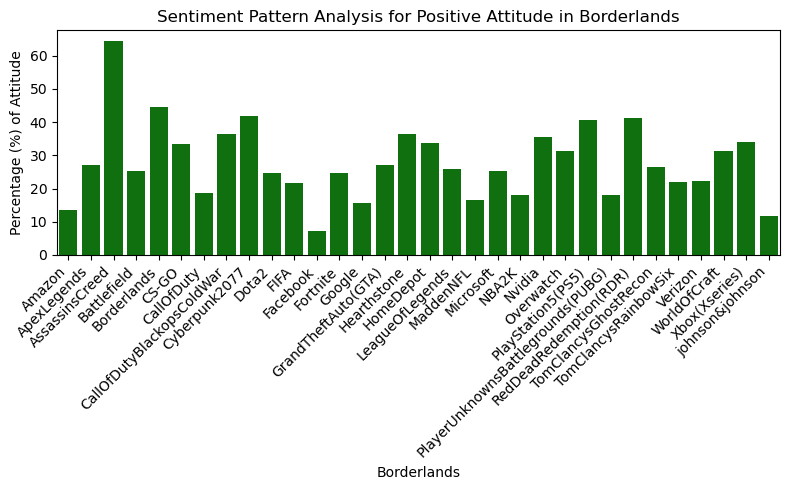

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cross_tab_normalized is already defined
# Define a unique color palette for each sentiment category
color_palette = {
    'Positive': 'green',
    'Negative': 'Red',
    'Neutral': 'blue',
    'Irrelevant': 'coral'
}

# Iterate over each column (sentiment category) in the normalized DataFrame
for sentiment in cross_tab_normalized.columns:
    plt.figure(figsize=(8, 5))
    
    # Plot the current sentiment category with the defined unique color
    sns.barplot(x=cross_tab_normalized.index, y=cross_tab_normalized[sentiment], color=color_palette.get(sentiment, 'gray'))
    
    # Add titles and labels
    plt.title(f'Sentiment Pattern Analysis for {sentiment} Attitude in Borderlands')
    plt.xlabel('Borderlands')
    plt.ylabel('Percentage (%) of Attitude')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


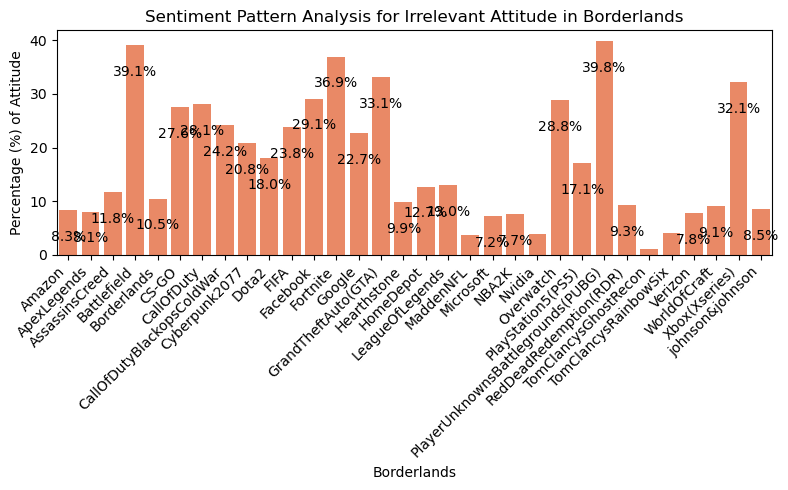

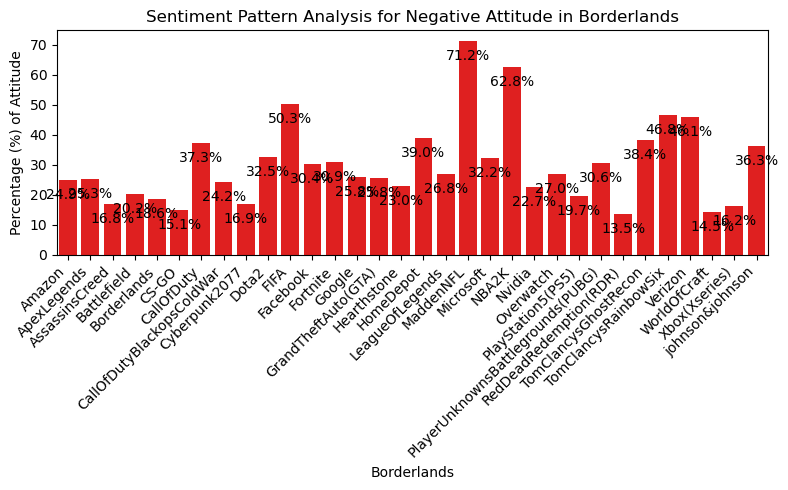

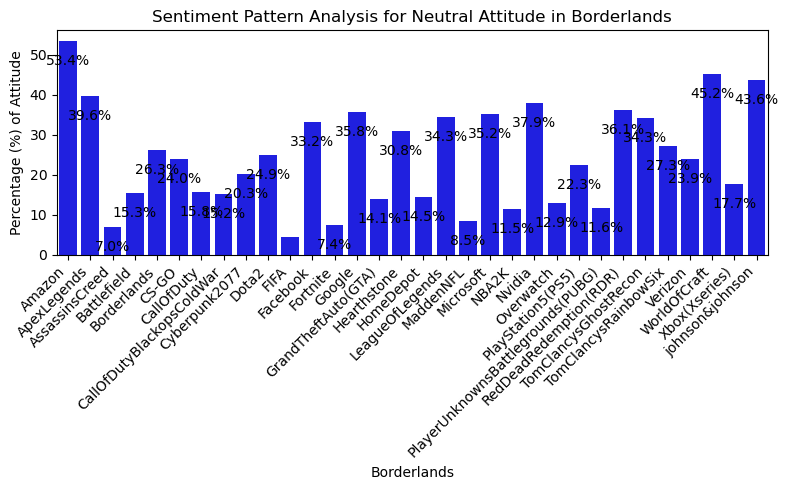

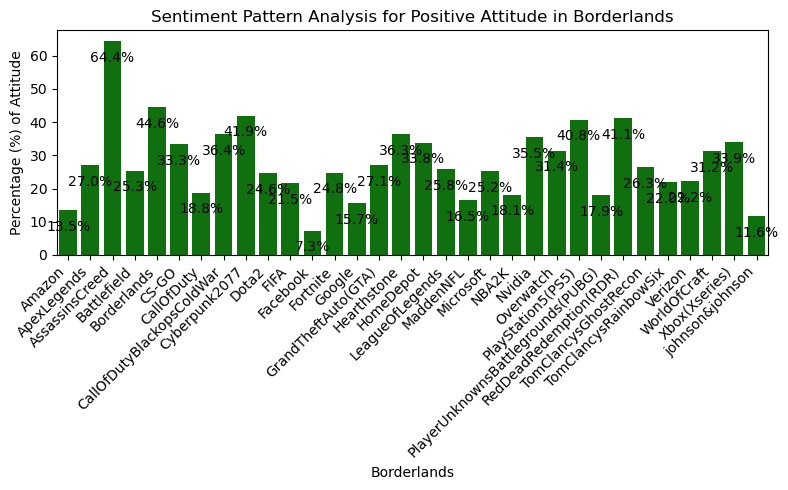

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cross_tab_normalized is already defined
# Define a unique color palette for each sentiment category
color_palette = {
    'Positive': 'green',
    'Negative': 'Red',
    'Neutral': 'blue',
    'Irrelevant': 'coral'
}

# Iterate over each column (sentiment category) in the normalized DataFrame
for sentiment in cross_tab_normalized.columns:
    plt.figure(figsize=(8, 5))
    
    # Plot the current sentiment category with the defined unique color
    ax = sns.barplot(x=cross_tab_normalized.index, y=cross_tab_normalized[sentiment], color=color_palette.get(sentiment, 'gray'))
    
    # Add titles and labels
    plt.title(f'Sentiment Pattern Analysis for {sentiment} Attitude in Borderlands')
    plt.xlabel('Borderlands')
    plt.ylabel('Percentage (%) of Attitude')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage labels inside each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height() - 5), 
                    ha='center', va='center', fontsize=10, color='black')
    
    # Display the plot
    plt.tight_layout()
    plt.show()
